In [1]:
import requests
from bs4 import BeautifulSoup
import datetime
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Constants
News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?"
#News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?month=11&day=24&year=2021&hour=00&page=1&pagesize=100"

Total_Days = 7 #Number of days to fetch
StockSymbol_Required = 2

In [3]:
# Global Variables
arr_Date = []
arr_newsTitle = []
arr_newsPara = []
arr_newsUrl = []

In [4]:
# Date for extracting webpage
currentDate = datetime.datetime.now()
tempDate = currentDate

In [5]:
def prepare_URL(dayToFetch) -> str:
   urlByDay = News_URL + 'month=' + str(currentDate.month) + '&day=' + str(dayToFetch) + '&year=' + str(currentDate.year) + '&hour=00&page=1&pagesize=100'
   return urlByDay

In [6]:
def parse_News(forDay):
  url = prepare_URL(forDay)
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")

  # to extract main layout content
  main = soup.find_all('main',class_='headline-listing')

  for elements in main:
    lstContainer = elements.find_all('section',class_='container')
    for mainHead in lstContainer:
      row = mainHead.find_all('div',class_='row')
      for mainCol in row:
        rowList = mainCol.find_all('div',class_='col-md-8 col-sm-8 card-list card-list-hr')
        for newsCard in rowList:
          newsLst = newsCard.find_all('a',class_='newsreleaseconsolidatelink')
          for content in newsLst:
            href = content.get('href')
            small = content.h3.small.text
            content.h3.small.decompose()
            h3 = content.h3.text.replace("\n", "")
            p =  content.p.text
            arr_Date.append(small)
            arr_newsTitle.append(h3)
            arr_newsPara.append(p)
            arr_newsUrl.append(href)

In [7]:
#Fetch & Parse data of last week
i = 0
while i < Total_Days:
  parse_News(currentDate.day - i)
  i = i + 1

In [8]:
# Write data to csv
dictNews = {'Date': arr_Date, 'Title': arr_newsTitle, 'Content': arr_newsPara, 'Url': arr_newsUrl}
df = pd.DataFrame(dictNews)
df.to_csv('newsData.csv')

df.head()

,Date,Title,Content,Url
0,"Dec 02, 2021, 23:59 ET",El Banco de Londres se lanza hoy como el prime...,El Banco de Londres se lanza hoy como el 6.o b...,/news-releases/el-banco-de-londres-se-lanza-ho...
1,"Dec 02, 2021, 23:56 ET",SHAREHOLDER ALERT: Pomerantz Law Firm Investig...,Pomerantz LLP is investigating claims on behal...,/news-releases/shareholder-alert-pomerantz-law...
2,"Dec 02, 2021, 23:55 ET",SHAREHOLDER ALERT: Pomerantz Law Firm Investig...,Pomerantz LLP is investigating claims on behal...,/news-releases/shareholder-alert-pomerantz-law...
3,"Dec 02, 2021, 23:54 ET",SHAREHOLDER ALERT: Pomerantz Law Firm Investig...,Pomerantz LLP is investigating claims on behal...,/news-releases/shareholder-alert-pomerantz-law...
4,"Dec 02, 2021, 23:53 ET",SHAREHOLDER ALERT: Pomerantz Law Firm Investig...,Pomerantz LLP is investigating claims on behal...,/news-releases/shareholder-alert-pomerantz-law...


In [9]:
#given a list of  few popular stock exchanges, user inputs one specific industry.
print(" 1.NYSE (New York Stock Exchange) \n 2.TSX (Toronto Stock Exchange) \n 3.NASDAQ ( National Association of Securities Dealers Automated Quotation)  ")
choice = int(input("Please enter the respective number for choosing  a specific stock exchange from the above list: "))



 1.NYSE (New York Stock Exchange) 
 2.TSX (Toronto Stock Exchange) 
 3.NASDAQ ( National Association of Securities Dealers Automated Quotation)  
Please enter the respective number for choosing  a specific stock exchange from the above list: 1


In [10]:
#searching the stock exchanges from the news dataframe 
stock_ex = { 1 : 'NYSE', 2:'TSX',3:'NASDAQ'}

In [11]:
StockIndustry_Search = stock_ex[choice]
print(StockIndustry_Search)

NYSE


In [12]:
#Search stock symbols of given industry

searchString = StockIndustry_Search + ': ([a-zA-Z]+)'
df_stockSymbols = df['Content'].str.extract(searchString, expand=False)

# Dropping the duplicates 
df_stockSymbols = df_stockSymbols.drop_duplicates()

# Dropping the missing values.
df_stockSymbols = df_stockSymbols.dropna() 

In [13]:
df_stock_list = df_stockSymbols

df_stock_list = df_stock_list.head(5)
df_stock_list

2      ZME
3     GOTU
4     SNAP
6      DNA
21     CEI
Name: Content, dtype: object

In [14]:
#picking up the latest 5 stocks from the entire stock list
stocks = df_stock_list.tolist()
stocks

['ZME', 'GOTU', 'SNAP', 'DNA', 'CEI']

In [15]:
for i, item in enumerate(stocks, start=1):
    print(i,item)
print("Please enter the respective number for choosing two stocks from the above list: ")
    
a,b=map(int,input().split())


1 ZME
2 GOTU
3 SNAP
4 DNA
5 CEI
Please enter the respective number for choosing two stocks from the above list: 
1 2


In [16]:
print (a) 
print (b) 

1
2


In [17]:
#creating dictionary to map the choice for particular stocks
stocks_list = { i : stocks[i-1] for i in range(1, len(stocks)+1 ) }

In [18]:
stocks_list

{1: 'ZME', 2: 'GOTU', 3: 'SNAP', 4: 'DNA', 5: 'CEI'}

In [19]:
#printing first stock
stock1=stocks_list[a]
stock1

'ZME'

In [20]:
#printing second stock
stock2=stocks_list[b]
stock2

'GOTU'

In [21]:
selected_stock = (stock1,stock2)

In [22]:
selected_stock

('ZME', 'GOTU')

#Yahoo Finance API


In [23]:
pip install yahoofinancials

In [24]:
pip install yfinance

In [25]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [26]:
#Get stock details for the 2 symbols for specific period
stock_df = yf.download(selected_stock, 
                      start='2021-09-01', 
                      end='2021-11-30', 
                      progress=False,
)
stock_df.head()

Adj Close       Close        ...  Open          Volume        
                GOTU   ZME  GOTU   ZME  ...  GOTU   ZME      GOTU     ZME
Date                                    ...                              
2021-09-01      3.15  3.49  3.15  3.49  ...  2.87  3.27  24478400   89600
2021-09-02      3.10  3.16  3.10  3.16  ...  3.36  3.40  10218500   40500
2021-09-03      3.15  3.47  3.15  3.47  ...  3.15  3.22   7574400  117600
2021-09-07      3.28  3.41  3.28  3.41  ...  3.21  3.37  15978400   30700
2021-09-08      2.86  3.39  2.86  3.39  ...  3.21  3.40  12748500   23400

[5 rows x 12 columns]

**Stock price comparison**

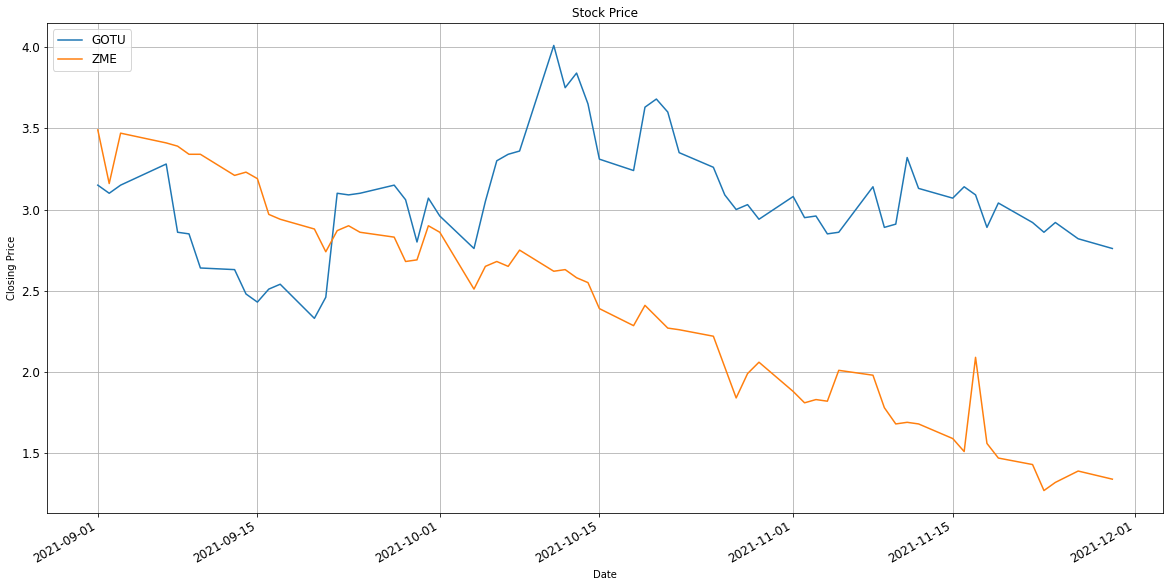

In [27]:
df = stock_df['Close']
ax = df.plot(title='Stock Price', fontsize=12, figsize=(20, 10))
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

**Stock's Volume Comparison**

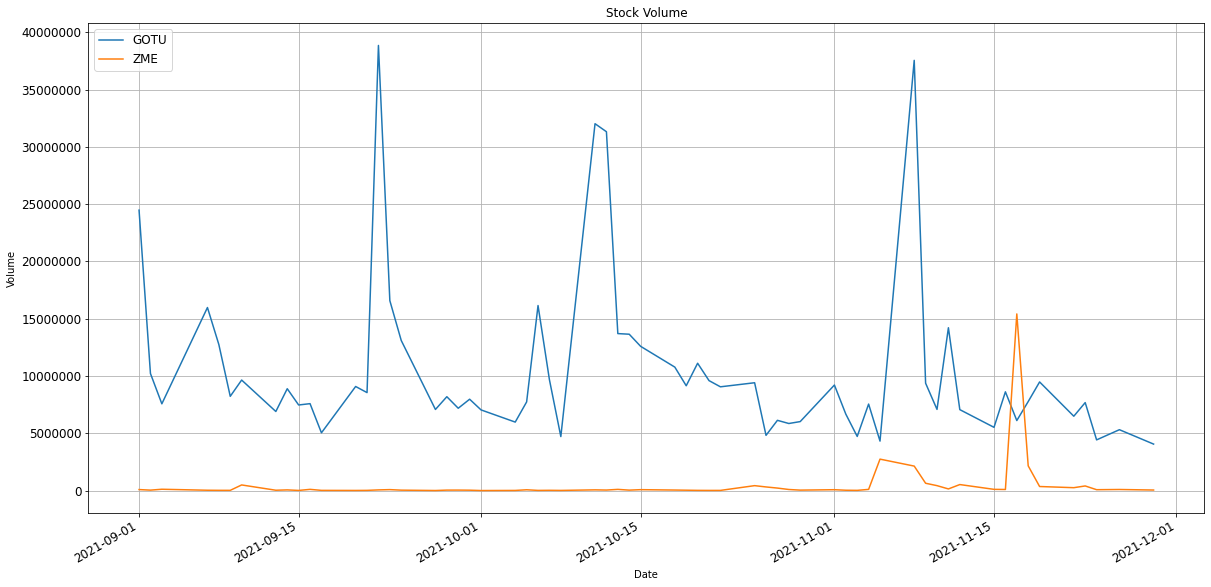

In [28]:
df = stock_df['Volume']
axis = df.plot(title='Stock Volume', fontsize=12, figsize=(20, 10))
axis.set_xlabel("Date")
axis.set_ylabel("Volume")

# to remove scientific notation from matplotlib
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

In [29]:
yahoo_financials = YahooFinancials(selected_stock[0])
data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2021-12-1', 
                                                  time_interval='weekly')
stock1_df = pd.DataFrame(data[selected_stock[0]]['prices'])
stock1_df = stock1_df.drop('date', axis=1).set_index('formatted_date')
stock1_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2021-06-07,20.52,13.11,16.129999,13.43,3493900,13.43
2021-06-14,15.90,12.03,13.300000,12.87,1619000,12.87
2021-06-21,15.88,12.20,12.740000,14.67,1949200,14.67
2021-06-28,19.00,10.37,14.260000,11.12,9592400,11.12
2021-07-05,12.13,9.15,10.610000,10.84,1659400,10.84


In [30]:
yahoo_financials = YahooFinancials(selected_stock[1])
data=yahoo_financials.get_historical_price_data("2021-11-01", "2022-01-1", "monthly")
stock2_df = pd.DataFrame(data[selected_stock[1]]['prices'])
stock2_df = stock2_df.drop('date', axis=1).set_index('formatted_date')
stock2_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2021-11-01,3.42,2.520,3.00,2.67,192950100,2.67
2021-12-01,2.73,2.325,2.65,2.38,11355300,2.38
2021-12-02,2.48,2.325,2.42,2.38,4735530,2.38


In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

Creating a new Dataframe and Training data

In [ ]:
# 1. Filter out the closing market price data
close_data = stock1_df.filter(['close'])

# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(5,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-5:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))
  
print(x_train_data2)

Building LSTM Mode

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compiling the Model

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

14/14 [==============================] - 3s 6ms/step - loss: 0.0321


Testing the model on testing data

In [47]:
# Creating a dataset for testing
test_data = scaled_data[training_data_len - 5: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(5,len(test_data)):
    x_test.append(test_data[i-5:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

[[3.557973 ]
 [3.5223563]
 [3.4779854]
 [3.4221857]
 [3.3591228]
 [3.3080916]
 [3.254205 ]]


Error Calculation

In [44]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

1.7020202194747205


Make Predictions

IndexError: ignored

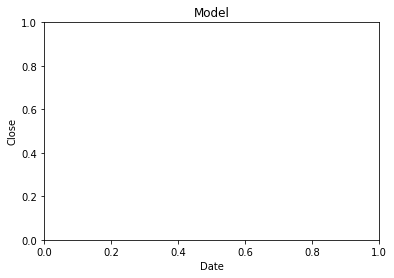

In [52]:
train = scaled_data[:training_data_len]
valid = scaled_data[training_data_len:]
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()